# ** Milestone 1: Data Preparation & Initial Analysis **




In [93]:
# -------------------------------
# 1. Setup Project Environment
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except NameError:
    pass

In [94]:
# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("GlobalWeatherRepository.csv")

# Quick peek at the original data
print("Original Dataset Shape:", df.shape)
print("Original Dataset Columns:")
print(df.columns)
print(df.head())


Original Dataset Shape: (135023, 41)
Original Dataset Columns:
Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52     

In [95]:

# -------------------------------
# 3. Create a Copy for Normalization and Inspection
# -------------------------------
df_normalized = df.copy()



In [96]:
# -------------------------------
# 4. Inspect Dataset Structure
# -------------------------------
print("\n--- Inspecting the Normalized Dataset ---")
print(df_normalized.info())
print("\nSummary statistics:")
print(df_normalized.describe(include="all"))


--- Inspecting the Normalized Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135023 entries, 0 to 135022
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       135023 non-null  object 
 1   location_name                 135023 non-null  object 
 2   latitude                      135023 non-null  float64
 3   longitude                     135023 non-null  float64
 4   timezone                      135023 non-null  object 
 5   last_updated_epoch            135023 non-null  int64  
 6   last_updated                  135023 non-null  object 
 7   temperature_celsius           135023 non-null  float64
 8   temperature_fahrenheit        135023 non-null  float64
 9   condition_text                135023 non-null  object 
 10  wind_mph                      135023 non-null  float64
 11  wind_kph                      135023 non-null  float64
 12  w

In [97]:
# -------------------------------
# 5. Missing Values & Coverage
# -------------------------------
print("\nMissing values per column:\n", df_normalized.isnull().sum())
print("\nData coverage (non-null counts):\n", df_normalized.count())



Missing values per column:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone  

In [98]:
# -------------------------------
# 6. Data Cleaning & Preprocessing
# -------------------------------
# Drop duplicate rows
df_normalized = df_normalized.drop_duplicates()

# Convert the date column to datetime and set it as the index
date_col = 'last_updated'
df_normalized[date_col] = pd.to_datetime(df_normalized[date_col], errors='coerce')
df_normalized.set_index(date_col, inplace=True)

# Handle missing values using forward-fill and back-fill imputation
df_normalized = df_normalized.ffill().bfill()

# Drop redundant unit columns to keep only one standard unit for each measurement
redundant_cols_to_drop = [
    'temperature_fahrenheit',
    'wind_mph',
    'pressure_in',
    'precip_in',
    'visibility_miles',
    'feels_like_fahrenheit',
    'gust_mph'
]
df_normalized = df_normalized.drop(columns=redundant_cols_to_drop, errors='ignore')

In [99]:
# -------------------------------
# 7. Aggregate Data (Daily -> Monthly Averages) using groupby
# -------------------------------
# Extract month and year from the datetime index
df_normalized['month'] = df_normalized.index.month
df_normalized['year'] = df_normalized.index.year

# Group by year and month to get monthly averages
monthly_avg_df = df_normalized.groupby(['year', 'month']).mean(numeric_only=True)

print("\nMonthly averages (first 5 rows):")
print(monthly_avg_df.head())



Monthly averages (first 5 rows):
             latitude  longitude  last_updated_epoch  temperature_celsius  \
year month                                                                  
2023 8      18.596171  15.934573        1.693380e+09            23.109177   
     9      19.297636  21.853897        1.694800e+09            22.363110   
     10     19.427586  21.975658        1.697408e+09            20.858300   
     11     19.299494  21.962720        1.700131e+09            18.471591   
     12     19.306044  21.968945        1.702812e+09            16.832138   

             wind_kph  wind_degree  pressure_mb  precip_mm   humidity  \
year month                                                              
2023 8      11.533544   169.091772  1011.950949   0.389082  72.669304   
     9      10.559491   160.819051  1013.720212   0.148631  72.618300   
     10     10.981242   163.294028  1013.332152   0.163694  72.125000   
     11     11.754447   161.507491  1012.554333   0.139562  7

In [100]:
# Save the analyzed and changed DataFrame to a new CSV file
df_normalized.to_csv("Weather_Cleaned_For_Plotting.csv", index=True)

print("cleaned dataset saved successfully as 'Weather_Cleaned_For_Plotting.csv'")

cleaned dataset saved successfully as 'Weather_Cleaned_For_Plotting.csv'


# **Milestone 2: Core Analysis & Visualization Design**

In [101]:
# -------------------------------
# 8. Data Analysis (on the aggregated data)
# -------------------------------
# Calculate the correlation matrix
print("\nCorrelation Matrix:")
print(monthly_avg_df.corr())

# Analyze seasonal trends
seasonal_avg_df = monthly_avg_df.groupby('month').mean(numeric_only=True)
print("\nSeasonal average patterns:")
print(seasonal_avg_df)

# Identify extreme weather events
extreme_temp = monthly_avg_df.nlargest(5, 'temperature_celsius')
print("\nTop 5 hottest months:\n", extreme_temp[['temperature_celsius']])


Correlation Matrix:
                              latitude  longitude  last_updated_epoch  \
latitude                      1.000000   0.535845           -0.065520   
longitude                     0.535845   1.000000            0.350340   
last_updated_epoch           -0.065520   0.350340            1.000000   
temperature_celsius          -0.256129  -0.098158            0.255604   
wind_kph                     -0.158048   0.275193            0.413680   
wind_degree                  -0.265125  -0.007207            0.368672   
pressure_mb                   0.168721   0.303131            0.188564   
precip_mm                    -0.713246  -0.863086           -0.323692   
humidity                      0.180573  -0.327970           -0.406873   
cloud                        -0.338538  -0.051233            0.192571   
feels_like_celsius           -0.254865  -0.139627            0.204608   
visibility_km                -0.260906  -0.248978           -0.032729   
uv_index                     -

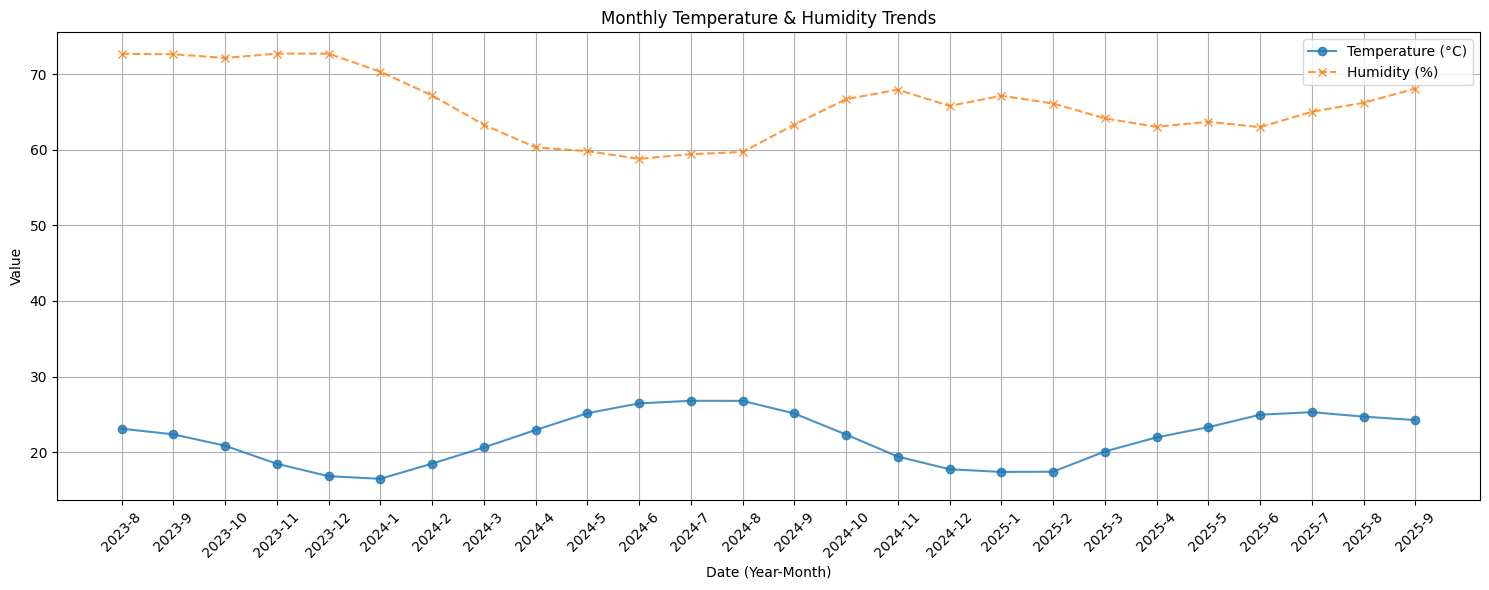

In [102]:
# -------------------------------
# 9. Visualization (Static)
# -------------------------------

plt.figure(figsize=(15, 6))

# Plot temperature with a marker and dotted line
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['temperature_celsius'],
         label="Temperature (°C)",
         marker='o',
         linestyle='-',
         alpha=0.8)

# Plot humidity with a marker and dashed line
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['humidity'],
         label="Humidity (%)",
         marker='x',
         linestyle='--',
         alpha=0.8)

plt.title("Monthly Temperature & Humidity Trends")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

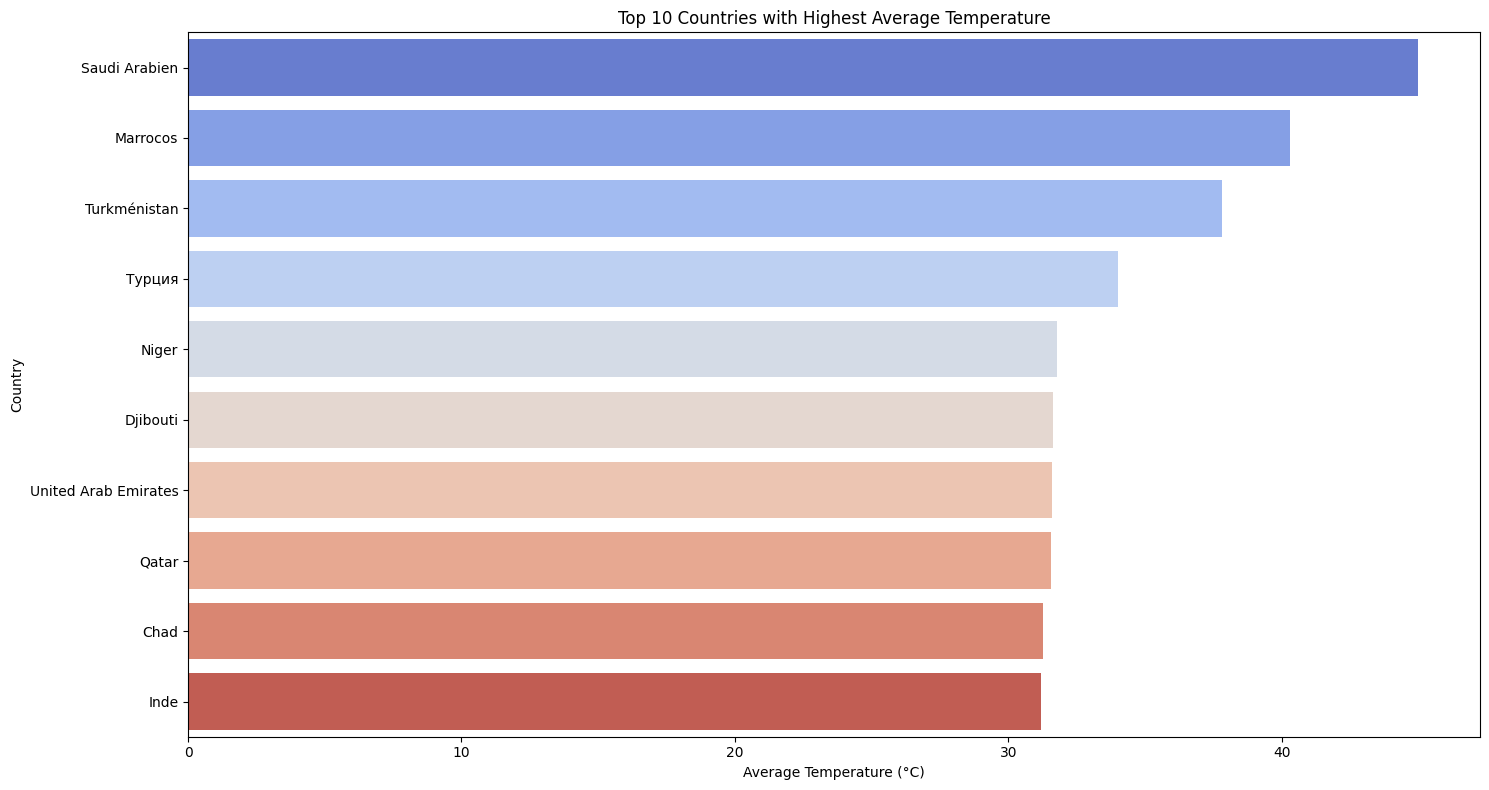

In [103]:
# Plot top 10 countries with the highest average temperature
# Compute top 10 countries with highest average temperature
avg_temp_by_country = (
    df.groupby("country")["temperature_celsius"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(15, 8))

# Use the 'country' column as hue to allow palette to work
sns.barplot(
    y="country",
    x="temperature_celsius",
    data=avg_temp_by_country,
    hue="country",         # Add this
    dodge=False,           # To avoid multiple bars
    palette="coolwarm",
    legend=False           # Optional: no legend needed since y already shows country
)

plt.ylabel("Country")
plt.xlabel("Average Temperature (°C)")
plt.title("Top 10 Countries with Highest Average Temperature")
plt.tight_layout()
plt.show()


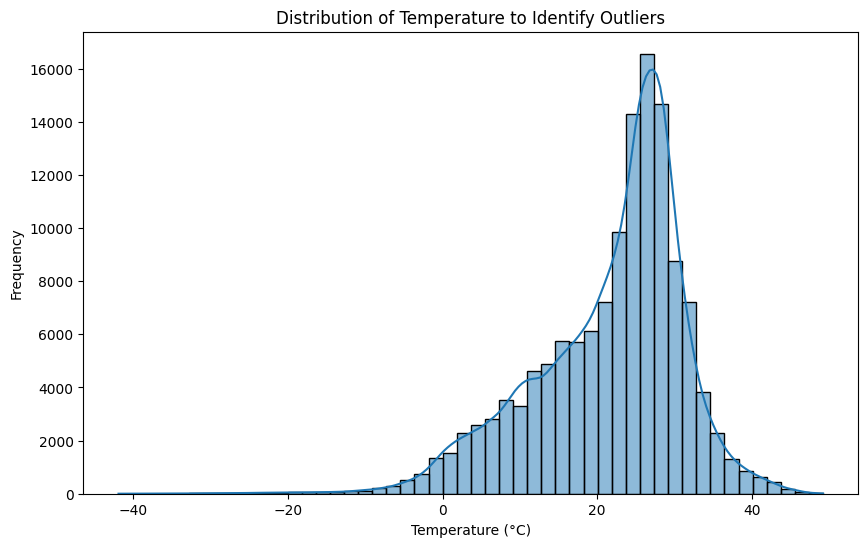

In [104]:
# Plot distribution of temperatures
# -------------------------------
# Histogram to Visualize Outliers
# -------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(x=df_normalized['temperature_celsius'], bins=50, kde=True)
plt.title('Distribution of Temperature to Identify Outliers')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

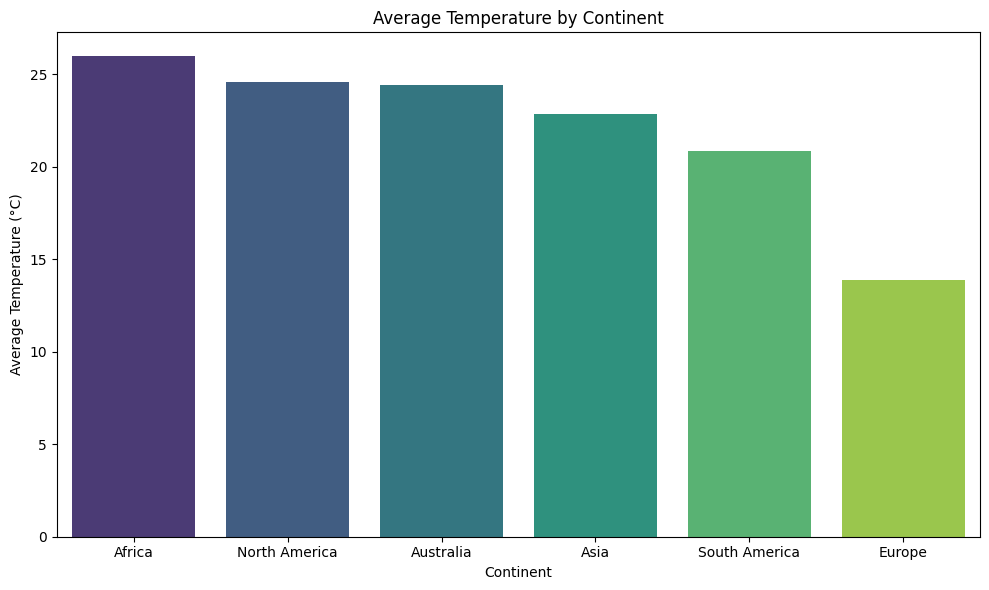

In [105]:
#-----------------------------------
#Average Temperature by Continent
#-------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('GlobalWeatherRepository.csv')

# Mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Australia',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Australia', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Australia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Marshall Islands': 'Australia', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mexico': 'North America', 'Micronesia': 'Australia', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar (Burma)': 'Asia',
    'Namibia': 'Africa', 'Nauru': 'Australia', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa', 'North Korea': 'Asia', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palau': 'Australia', 'Palestine': 'Asia',
    'Panama': 'North America', 'Papua New Guinea': 'Australia', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Australia', 'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Australia', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia',
    'South Sudan': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia', 'Vatican City': 'Europe', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Map countries to continents
df['continent'] = df['country'].map(country_to_continent)

# Drop rows where continent mapping failed
df.dropna(subset=['continent'], inplace=True)

# Compute average temperature by continent
continent_avg_temp = (
    df.groupby('continent')['temperature_celsius']
    .mean()
    .reset_index()
    .sort_values(by='temperature_celsius', ascending=False)
)

# Plot: Average temperature by continent (future-proof)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=continent_avg_temp,
    x='continent',
    y='temperature_celsius',
    hue='continent',     # explicit for palette use
    dodge=False,
    palette='viridis',
    legend=False
)
plt.xlabel("Continent")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature by Continent")
plt.tight_layout()

# Save the figure
plt.savefig('average_temperature_by_continent.png', bbox_inches='tight')
plt.show()


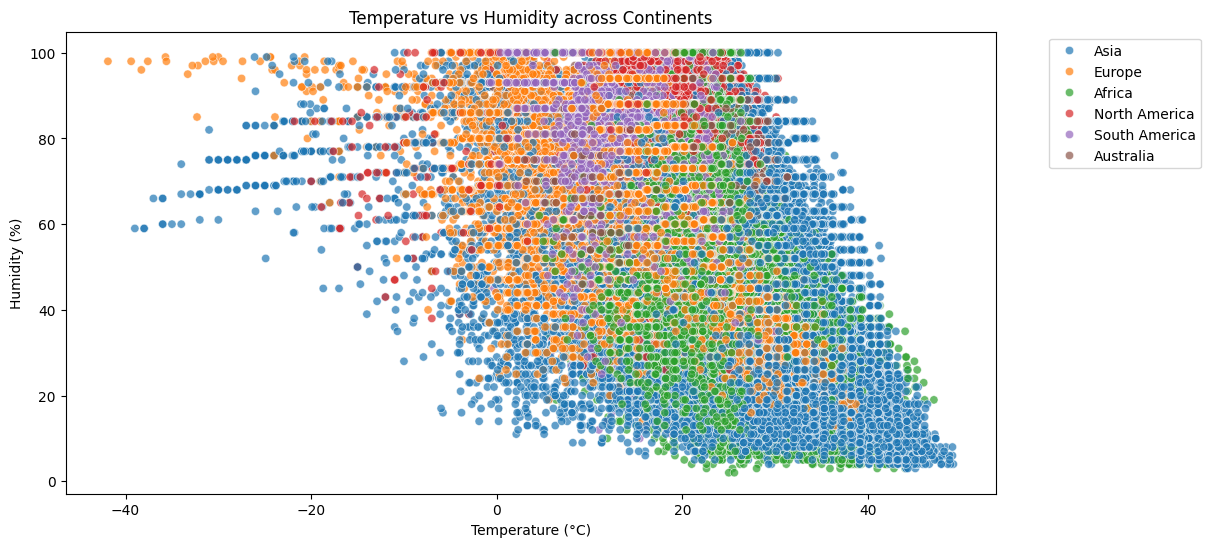

In [106]:
#---------------------------------
#Temperature Vs Humidity across Continents
#-------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('GlobalWeatherRepository.csv')

# Mapping of countries to continents
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Australia',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia', 'Bangladesh': 'Asia',
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bhutan': 'Asia', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cabo Verde': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia',
    'Colombia': 'South America', 'Comoros': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Congo (Kinshasa)': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Australia', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe',
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia',
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Australia', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa',
    'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa',
    'Malta': 'Europe', 'Marshall Islands': 'Australia', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mexico': 'North America', 'Micronesia': 'Australia', 'Moldova': 'Europe', 'Monaco': 'Europe', 'Mongolia': 'Asia',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar (Burma)': 'Asia',
    'Namibia': 'Africa', 'Nauru': 'Australia', 'Nepal': 'Asia', 'Netherlands': 'Europe', 'New Zealand': 'Australia',
    'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa', 'North Korea': 'Asia', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Palau': 'Australia', 'Palestine': 'Asia',
    'Panama': 'North America', 'Papua New Guinea': 'Australia', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Qatar': 'Asia', 'Romania': 'Europe',
    'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Australia', 'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Australia', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia',
    'South Sudan': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia',
    'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Togo': 'Africa', 'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia', 'Vatican City': 'Europe', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Create a new 'continent' column based on the 'country' column
df['continent'] = df['country'].map(country_to_continent)

# Remove rows where the continent could not be determined
df.dropna(subset=['continent'], inplace=True)

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="temperature_celsius",
    y="humidity",
    hue="continent",
    alpha=0.7
)

plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs Humidity across Continents")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to a file
plt.savefig('temperature_vs_humidity_by_continent.png', bbox_inches='tight')

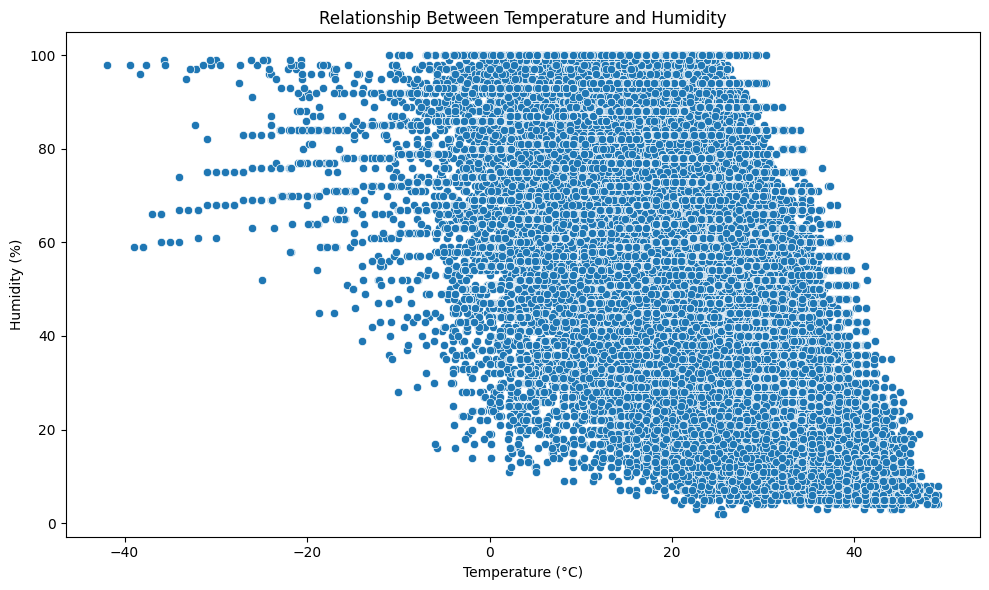

In [107]:
# -------------------------------
# Scatter Plot: Temperature vs. Humidity
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_celsius', y='humidity', data=df_normalized)
plt.title('Relationship Between Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()

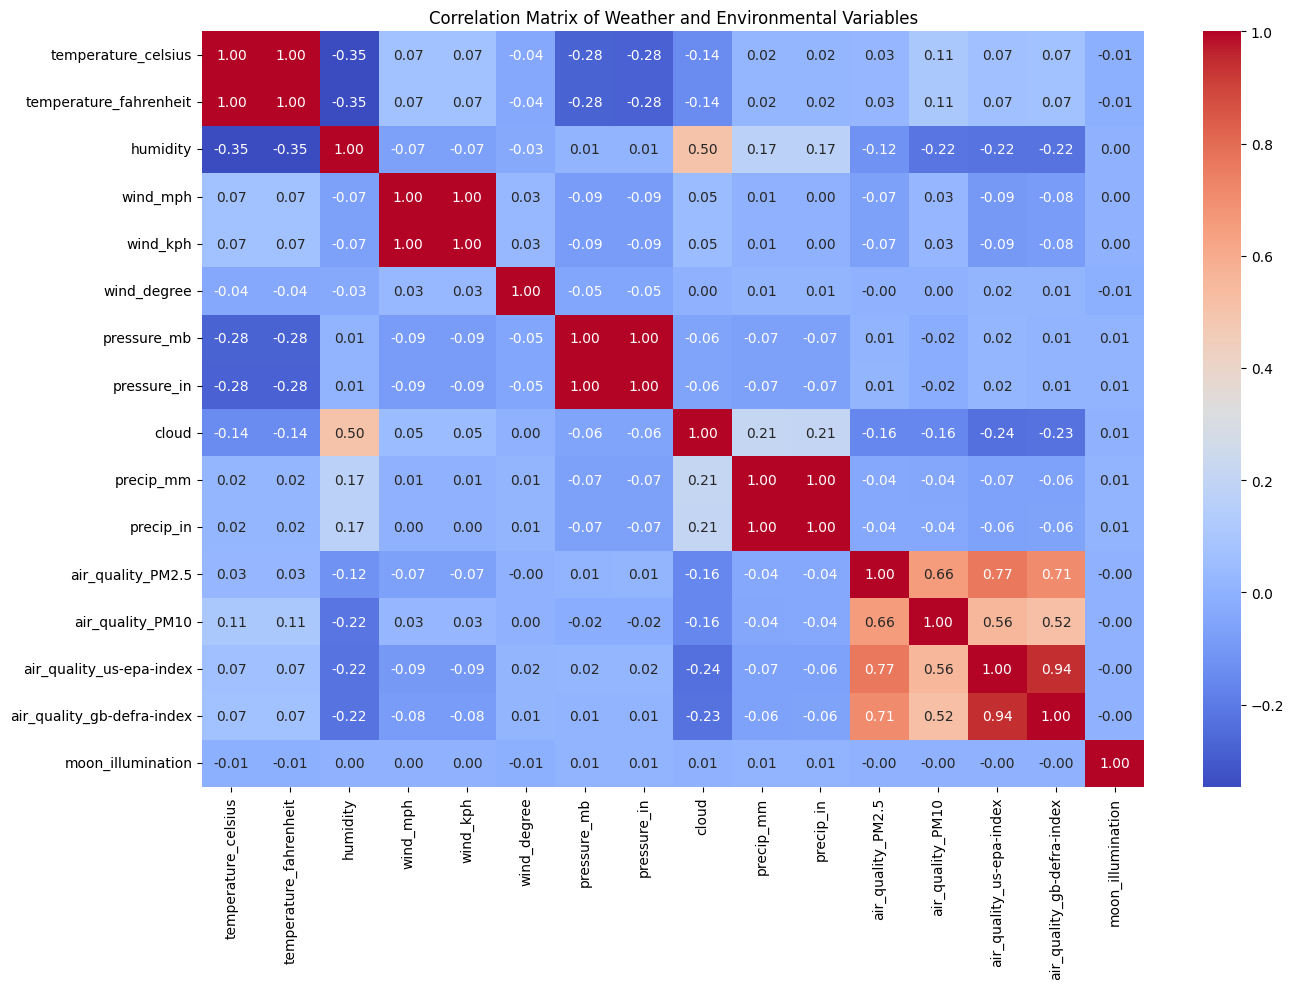

In [108]:
# -------------------------------
# Heatmap: Expanded Correlation Matrix
# -------------------------------

# Selecting a broader subset of numeric columns
numeric_cols = [
    'temperature_celsius', 'temperature_fahrenheit', 'humidity',
    'feelslike_celsius', 'wind_mph', 'wind_kph', 'wind_degree',
    'pressure_mb', 'pressure_in', 'cloud', 'precip_mm', 'precip_in',
    'air_quality_PM2.5', 'air_quality_PM10',
    'air_quality_us-epa-index', 'air_quality_gb-defra-index',
    'moon_illumination'
]

# Filter out only columns that actually exist in your DataFrame
numeric_cols = [col for col in numeric_cols if col in df.columns]

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather and Environmental Variables')
plt.tight_layout()
plt.show()


In [109]:
# ------------------------------- # Choropleth Map: Average Temperature by Country # -------------------------------
import plotly.express as px

def choropleth_by_parameter(df, parameter, agg_func='mean', color_scale=px.colors.sequential.Plasma):
    """
    Creates a choropleth map for a given weather parameter aggregated by country.

    Parameters:
    - df: DataFrame with at least ['country', <parameter>]
    - parameter: column name to aggregate (e.g., 'humidity')
    - agg_func: aggregation function ('mean', 'max', 'min', etc.)
    - color_scale: Plotly color scale
    """
    # Aggregate parameter by country
    agg_df = df.groupby('country')[parameter].agg(agg_func).reset_index()

    # Create choropleth
    fig = px.choropleth(
        agg_df,
        locations='country',
        locationmode='country names',
        color=parameter,
        hover_name='country',
        color_continuous_scale=color_scale,
        title=f'{agg_func.capitalize()} {parameter.replace("_", " ").title()} by Country'
    )
    fig.show()


choropleth_by_parameter(df, 'temperature_celsius', 'mean')   # Average temperature
choropleth_by_parameter(df, 'humidity', 'mean')              # Average humidity
choropleth_by_parameter(df, 'wind_kph', 'mean')              # Average wind speed
choropleth_by_parameter(df, 'pressure_mb', 'mean')           # Average pressure
choropleth_by_parameter(df, 'precip_mm', 'mean')             # Average precipitation
choropleth_by_parameter(df, 'air_quality_PM2.5', 'mean')     # Average PM2.5


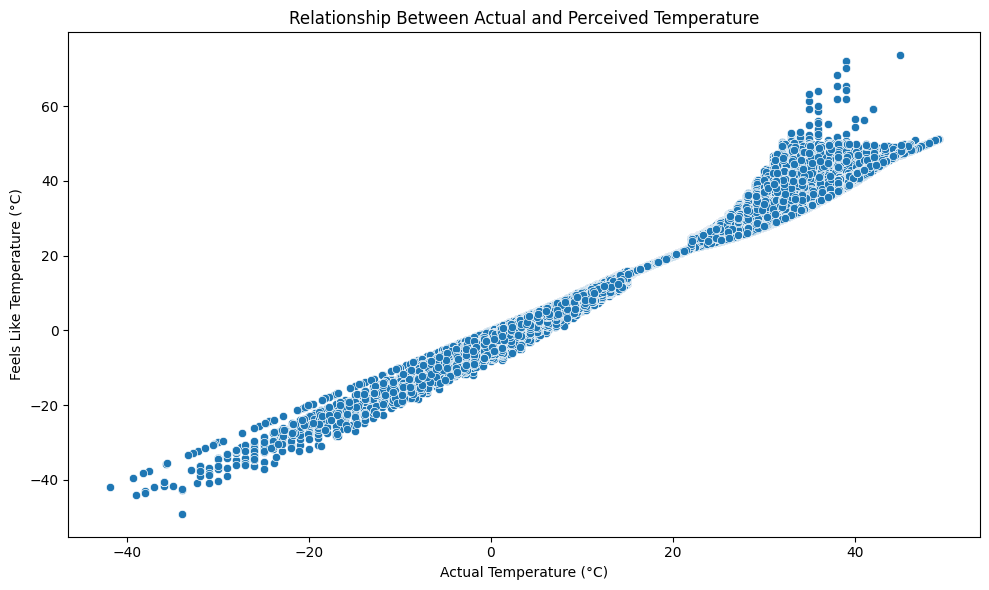

In [110]:
# -------------------------------
# Scatter Plot: Temperature vs. Feels Like Temperature
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_celsius', y='feels_like_celsius', data=df_normalized)
plt.title('Relationship Between Actual and Perceived Temperature')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Feels Like Temperature (°C)')
plt.tight_layout()
plt.show()

In [111]:
# -------------------------------
# Area Chart: Air Quality Trends (Ozone)
# -------------------------------
# Aggregate data for a smoother trend line
daily_avg_df = df_normalized.resample('D').mean(numeric_only=True).dropna()

fig = px.area(daily_avg_df, x=daily_avg_df.index, y="air_quality_Ozone", title='Daily Average Ozone Levels Over Time')
fig.show()

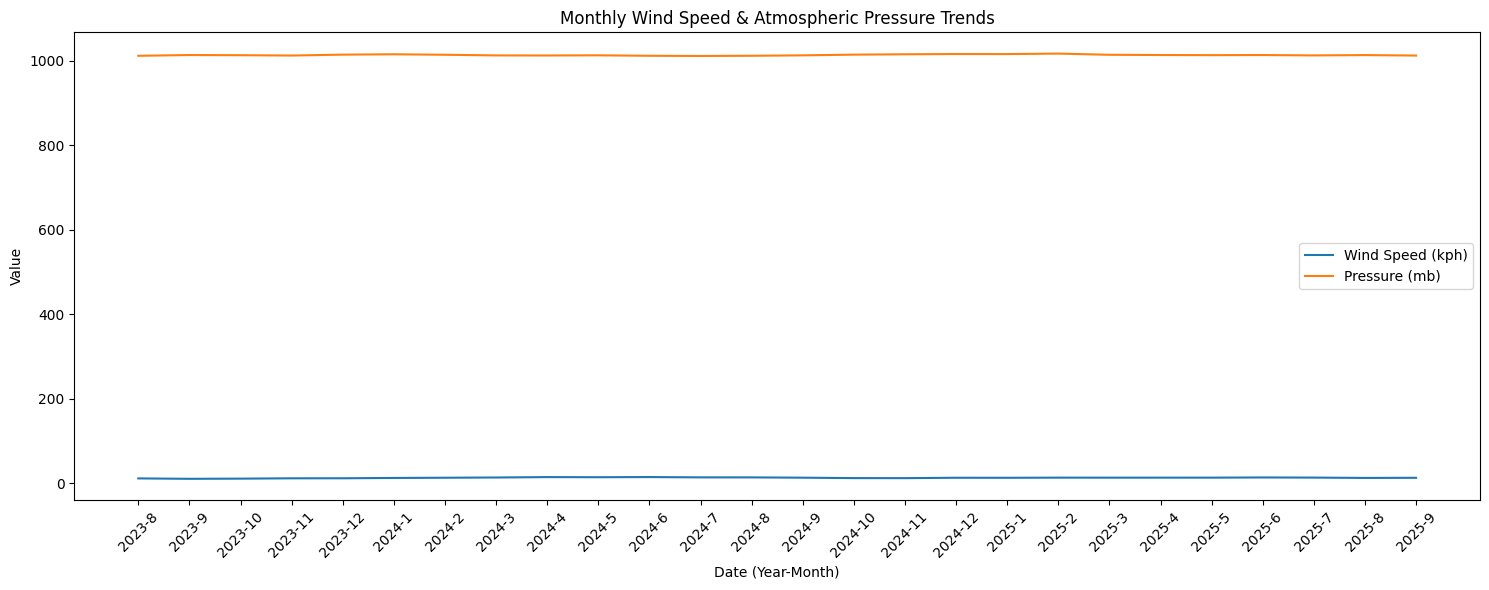

In [112]:
# -------------------------------
# Time-Series Plot: Wind Speed vs. Pressure
# -------------------------------
plt.figure(figsize=(15, 6))
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['wind_kph'], label="Wind Speed (kph)")
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['pressure_mb'], label="Pressure (mb)")
plt.title("Monthly Wind Speed & Atmospheric Pressure Trends")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
print(monthly_avg_df_reset[['date','wind_kph','pressure_mb']].tail())


         date   wind_kph  pressure_mb
21 2025-05-01  13.325071  1013.459101
22 2025-06-01  13.767311  1013.729901
23 2025-07-01  13.448825  1012.846739
24 2025-08-01  12.650480  1013.601257
25 2025-09-01  12.974615  1012.506410


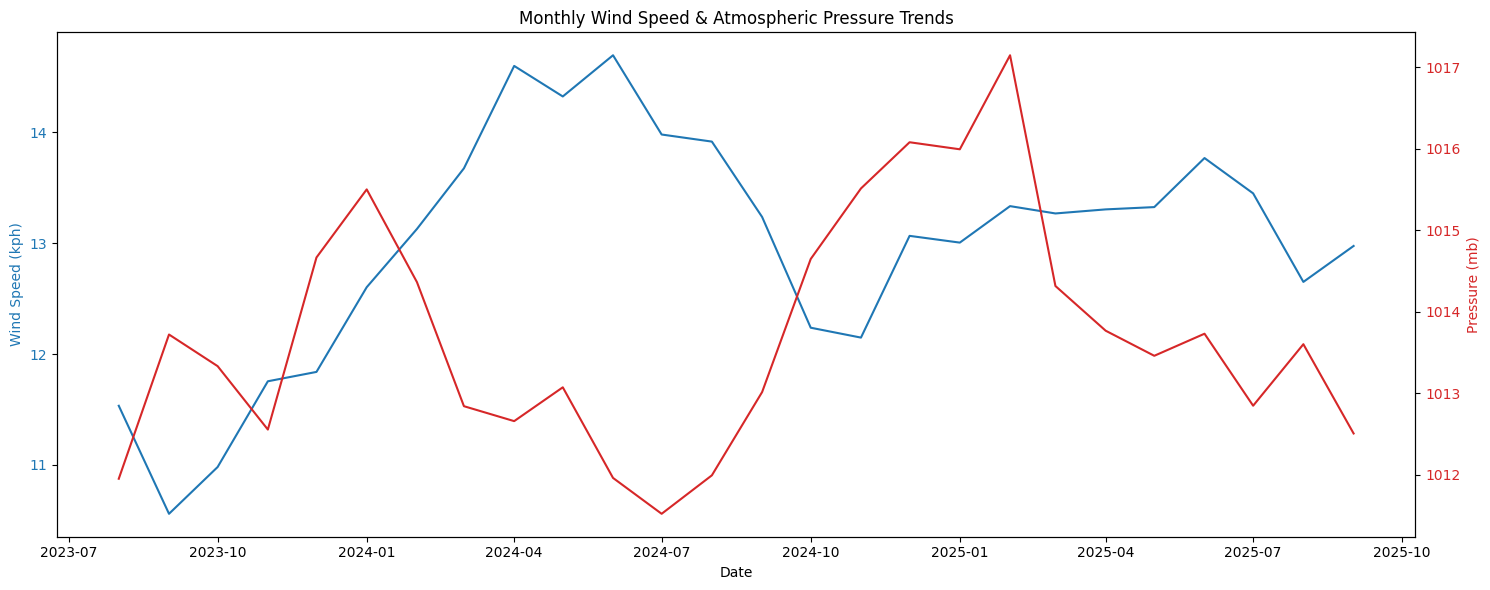

In [114]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot wind speed on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Speed (kph)', color=color)
ax1.plot(monthly_avg_df_reset['date'], monthly_avg_df_reset['wind_kph'], color=color, label='Wind Speed (kph)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Pressure (mb)', color=color)
ax2.plot(monthly_avg_df_reset['date'], monthly_avg_df_reset['pressure_mb'], color=color, label='Pressure (mb)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Wind Speed & Atmospheric Pressure Trends')
fig.tight_layout()
plt.show()


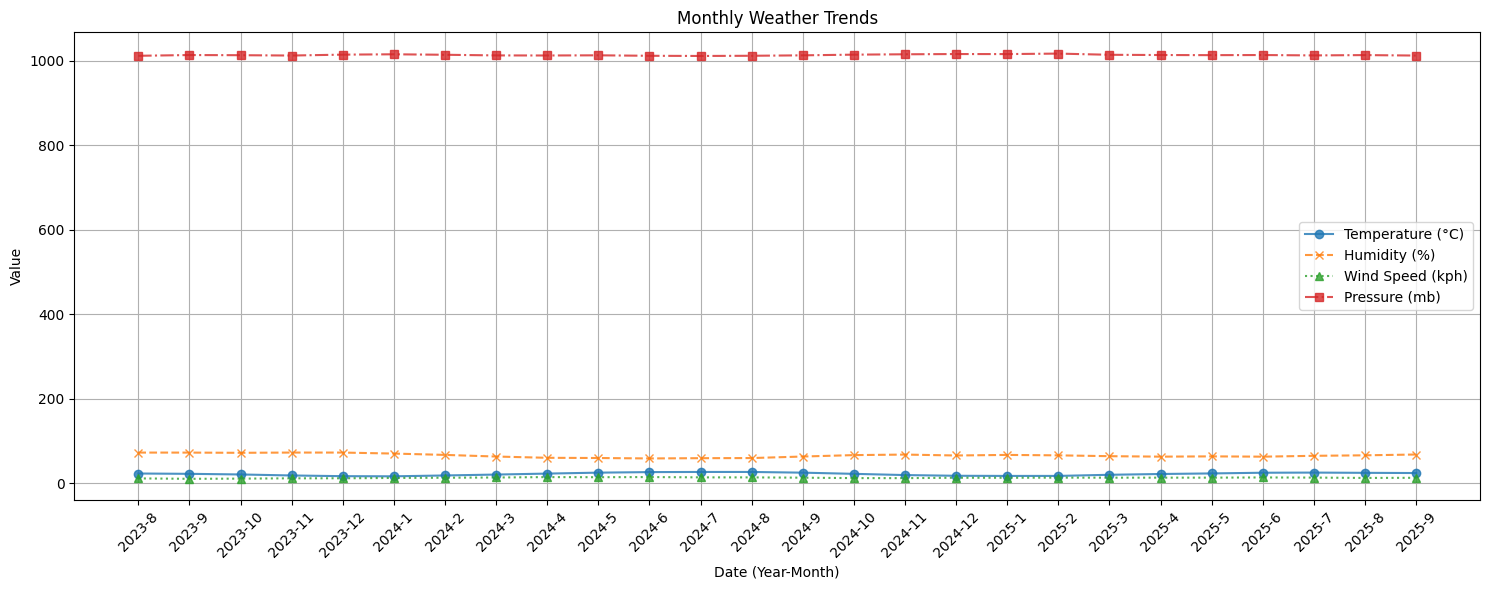

In [115]:
# -------------------------------
# Visualization of monthly weather trends
# -------------------------------
plt.figure(figsize=(15, 6))

# Plot temperature with a marker and dotted line
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['temperature_celsius'],
         label="Temperature (°C)",
         marker='o',
         linestyle='-',
         alpha=0.8)

# Plot humidity with a marker and dashed line
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['humidity'],
         label="Humidity (%)",
         marker='x',
         linestyle='--',
         alpha=0.8)

# Plot wind speed with a different marker and line style
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['wind_kph'],
         label="Wind Speed (kph)",
         marker='^',
         linestyle=':',
         alpha=0.8)

# Plot pressure with another marker and line style
plt.plot(monthly_avg_df.index.get_level_values('year').astype(str) + '-' + monthly_avg_df.index.get_level_values('month').astype(str),
         monthly_avg_df['pressure_mb'],
         label="Pressure (mb)",
         marker='s',
         linestyle='-.',
         alpha=0.8)

plt.title("Monthly Weather Trends")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

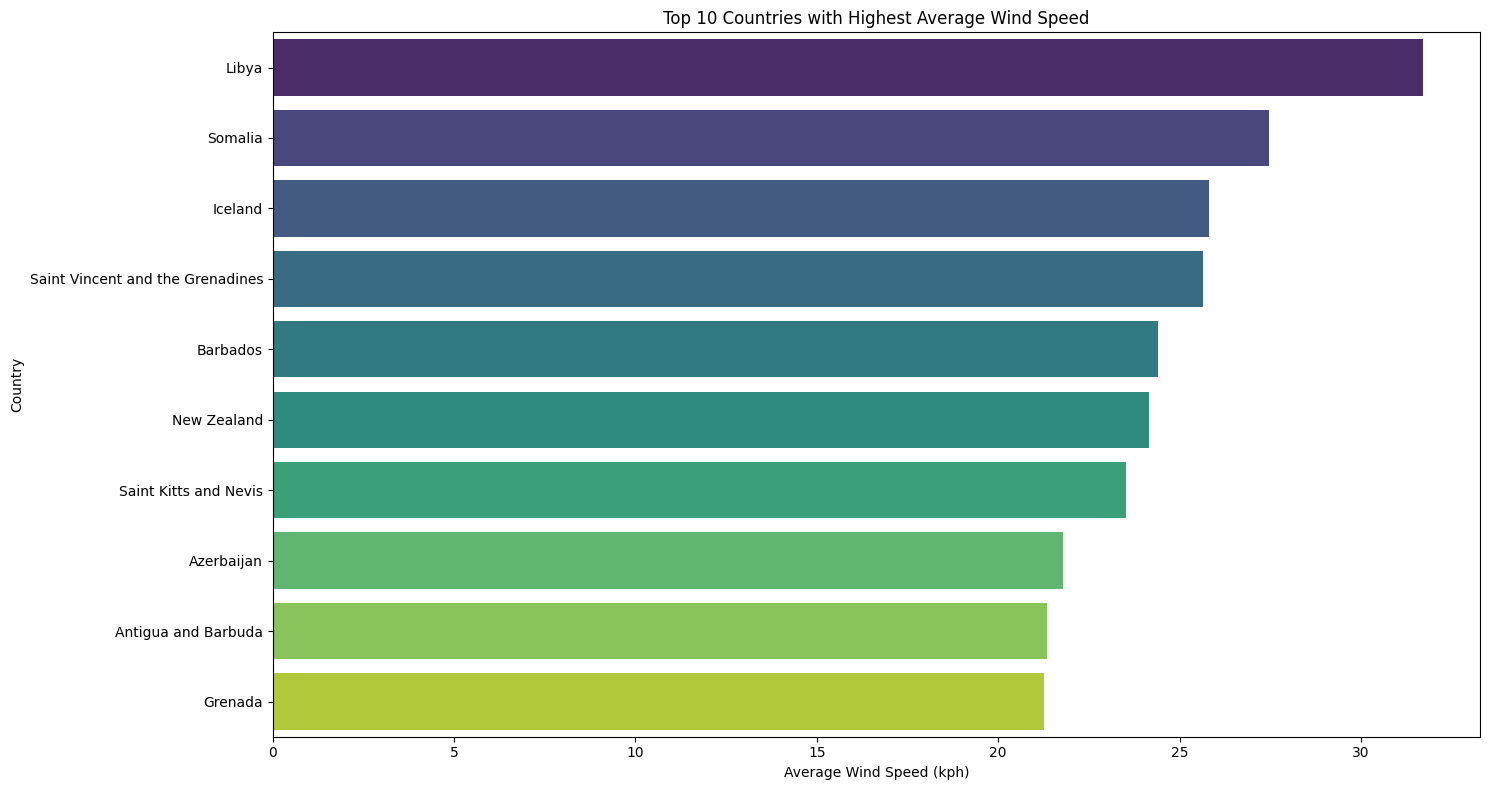

In [116]:
# -------------------------------
# Bar Plot: Top 10 Countries by Average Wind Speed
# -------------------------------
avg_wind_by_country = (
    df.groupby("country")["wind_kph"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(15, 8))

sns.barplot(
    data=avg_wind_by_country,
    y="country",
    x="wind_kph",
    hue="country",       #  for palette mapping
    dodge=False,         # keep single bars
    palette="viridis",
    legend=False         # no extra legend, y-axis already shows country
)

plt.ylabel("Country")
plt.xlabel("Average Wind Speed (kph)")
plt.title("Top 10 Countries with Highest Average Wind Speed")
plt.tight_layout()
plt.show()


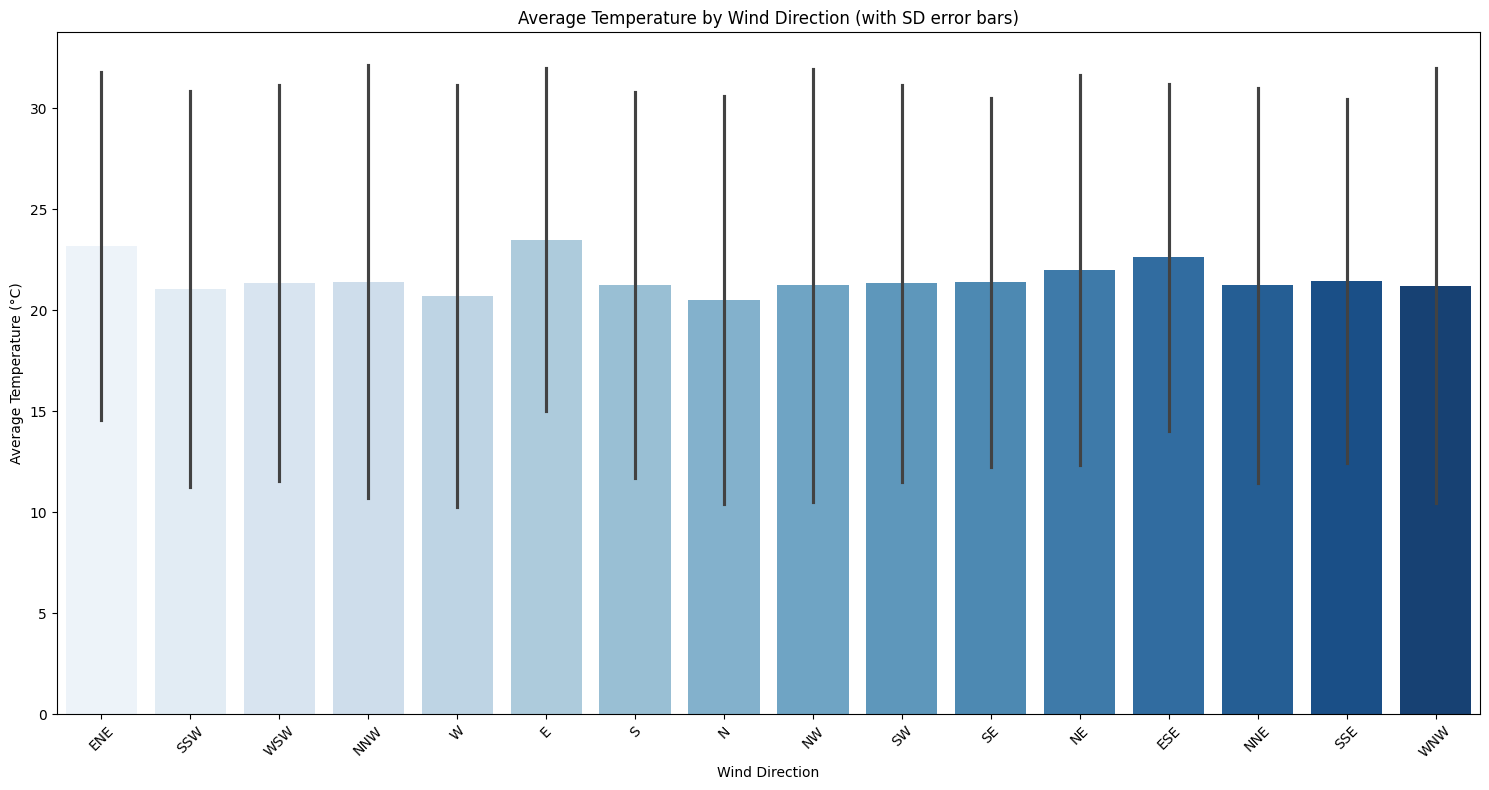

In [117]:
   # -------------------------------
   #Bar Plot (mean temperature per wind direction) -
   # -------------------------------
plt.figure(figsize=(15, 8))

sns.barplot(
    data=df_normalized,
    x='wind_direction',
    y='temperature_celsius',
    hue='wind_direction',   # explicit hue for palette mapping
    dodge=False,            # single bars, no grouping
    palette='Blues',
    errorbar='sd',
    legend=False
)

plt.title('Average Temperature by Wind Direction (with SD error bars)')
plt.xlabel('Wind Direction')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


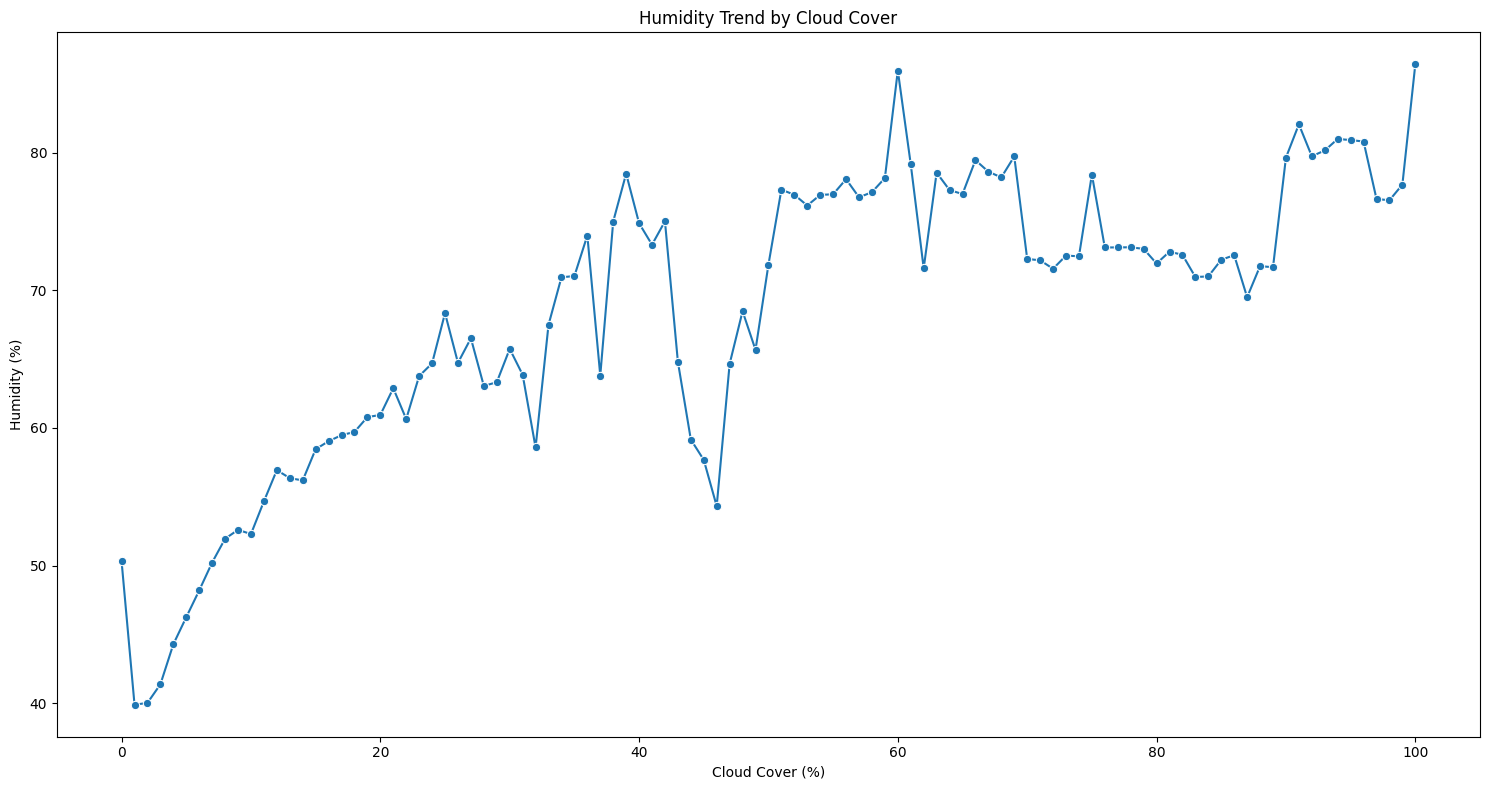

In [118]:
# -------------------------------
#  Humidity Distribution by Cloud Cover
# -------------------------------

plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_normalized,
    x='cloud',
    y='humidity',
    errorbar=None,      # update- replaces ci=None
    marker='o'
)

plt.title('Humidity Trend by Cloud Cover')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.show()


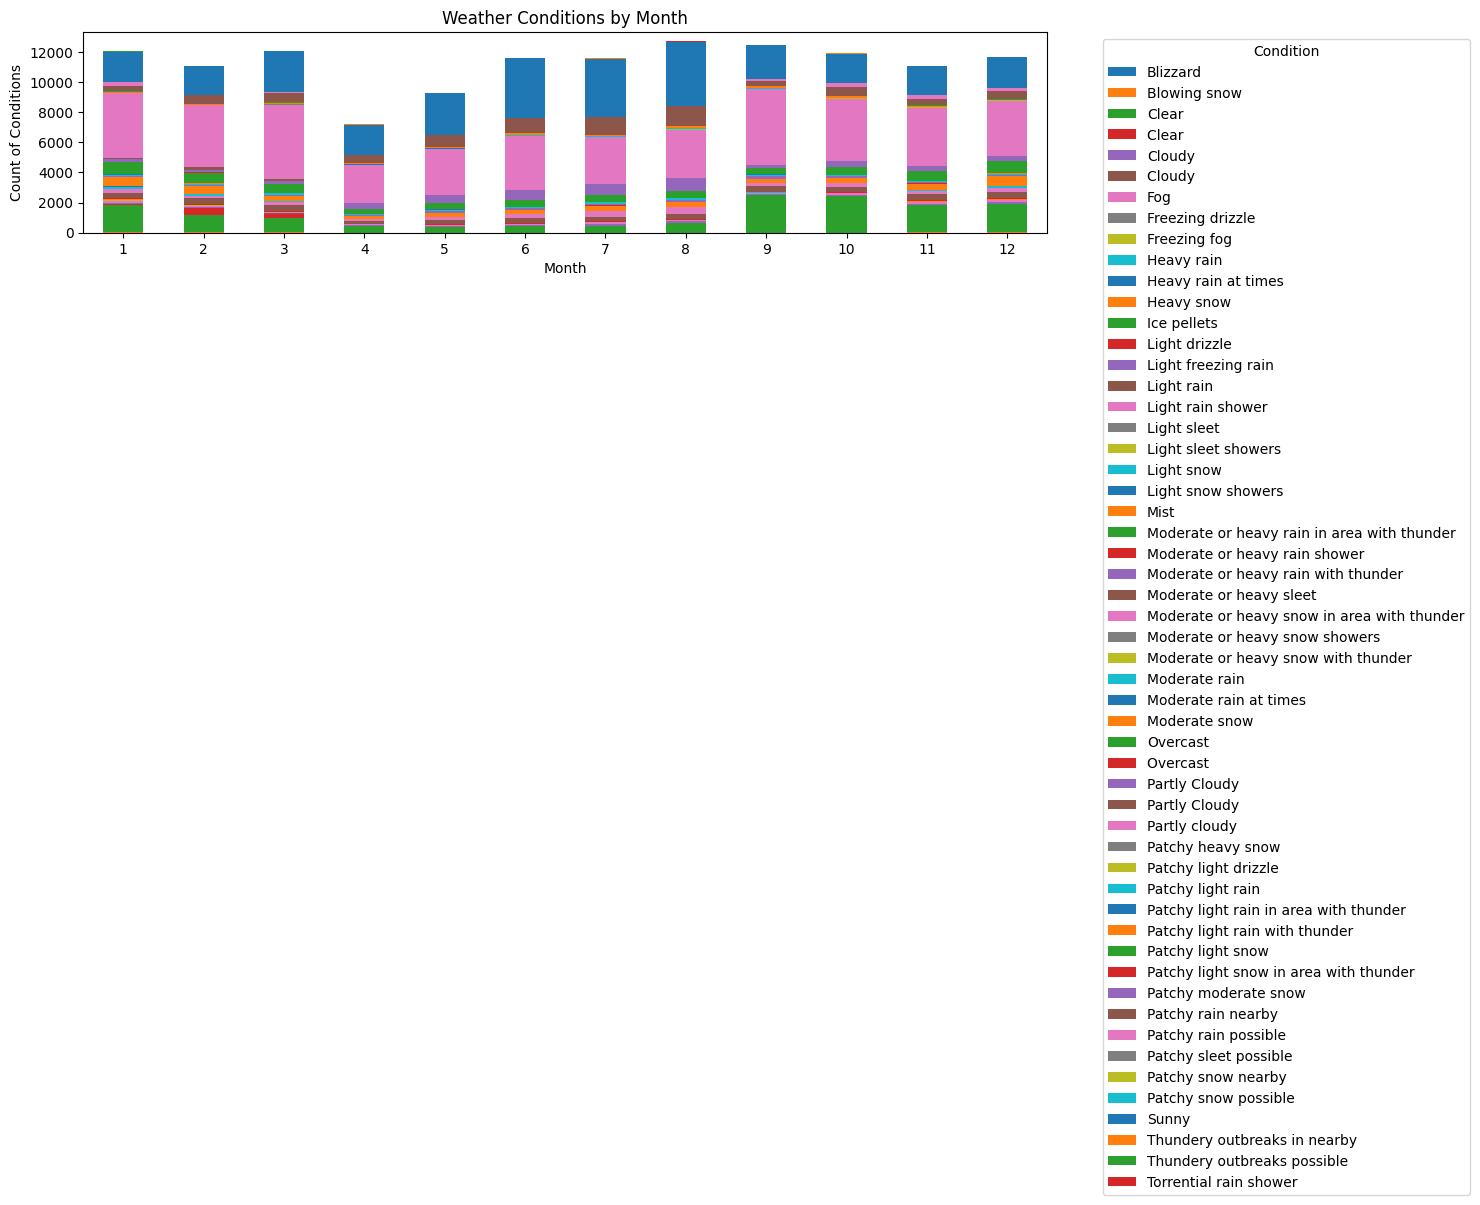

In [119]:
# -------------------------------
# Stacked Bar Chart: Weather Conditions by Month
# -------------------------------
# First, prepare the data by counting conditions per month
df_normalized['month'] = df_normalized.index.month
condition_counts = df_normalized.groupby(['month', 'condition_text']).size().reset_index(name='count')
pivot_df = condition_counts.pivot(index='month', columns='condition_text', values='count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Count of Conditions')
plt.xticks(rotation=0)
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()